<a href="https://colab.research.google.com/github/JOSPHATT/REALTIMEFOREX.py/blob/main/REALTIME_FOREX_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, AUDJPY to USDJPY
Columns: 418 entries, 0 to 417
dtypes: float64(418)
memory usage: 26.2+ KB


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >], dtype=object)

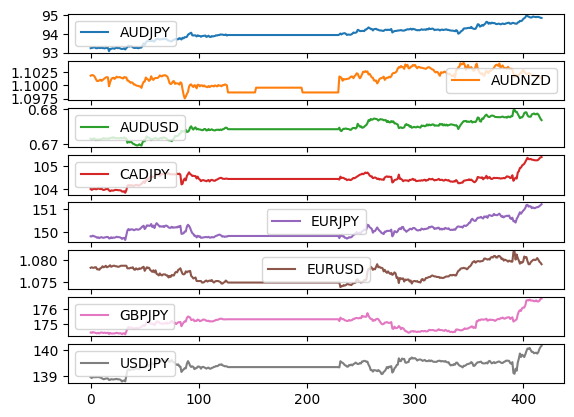

In [148]:
github_url='https://raw.githubusercontent.com/JOSPHATT/REALTIMEFOREX.py/main/realtimeforex.txt'
import requests
def data_gen(url):
    r = requests.get(url)
    data = r.text
    return data
Forex_data=data_gen(github_url)
last_char=len(Forex_data)
#print(Forex_data)
with open("myfile.txt", "w") as fp:
    fp.writelines(Forex_data)
import json
with open('myfile.txt') as f:
    content_list = [line.rstrip() for line in f]
FOREX_DATA={}
forex_data=[j.replace("'",'"') for j in content_list]
#print(forex_data)
C=0
for data in forex_data:  
    g=json.loads(data)
    FOREX_DATA[C]=g
    C=C+1
pairs=[['AUD','JPY'],['AUD','NZD'],['AUD','USD'],['CAD','JPY'],['EUR','JPY'],['EUR','USD'],['GBP','JPY'],['USD','JPY']]
n_pairs=[pair[0]+pair[1] for pair in pairs]
#print(n_pairs)
Forex_dataframe={}
for v in FOREX_DATA.values():
    for p in n_pairs:
        if p not in Forex_dataframe.keys():
            Forex_dataframe[p]=[v[p]]
        else:
            Forex_dataframe[p].append(v[p])

#load data into a DataFrame object:
import pandas as pd
df = pd.DataFrame(Forex_dataframe)

#currency pairs as rows
DataFrame=df.T
DataFrame.dtypes
DataFrame.info()


import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

Plot_styles=plt.style.available



#import time
#for style in Plot_styles:    
#plt.style.use(Plot_styles[7])

df.plot(kind='line', subplots=True)

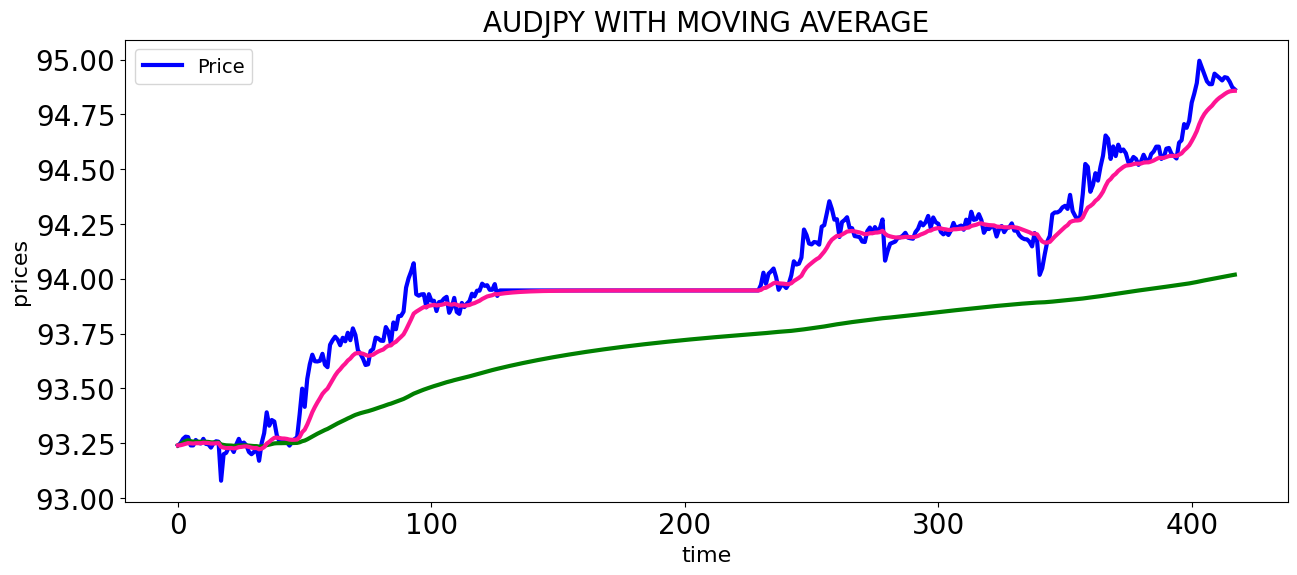

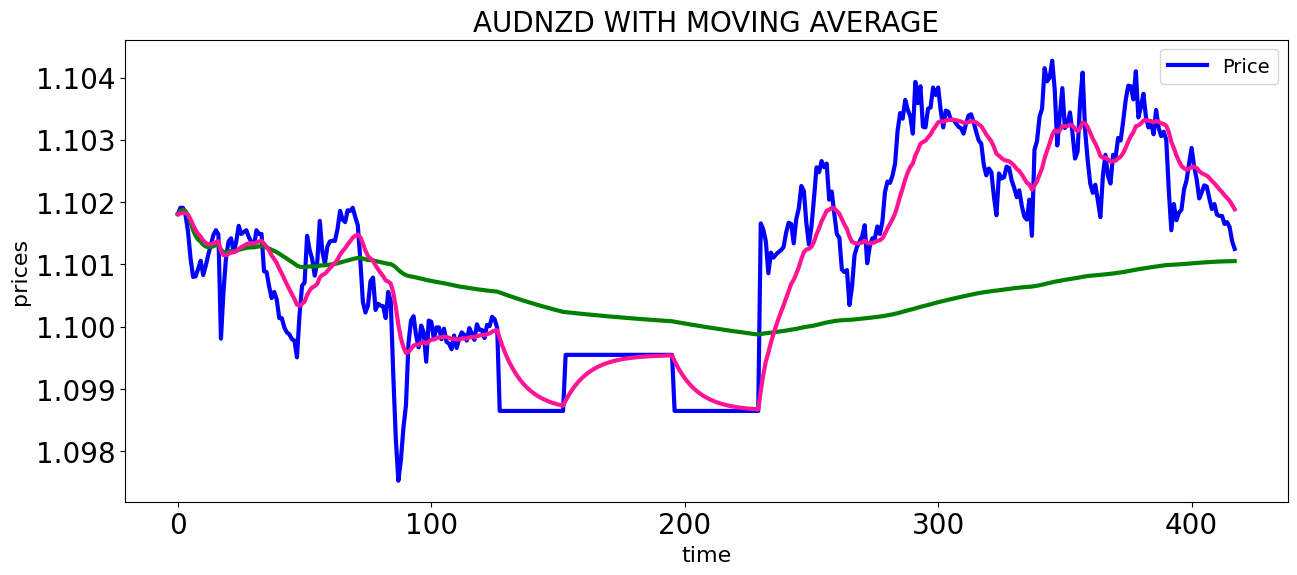

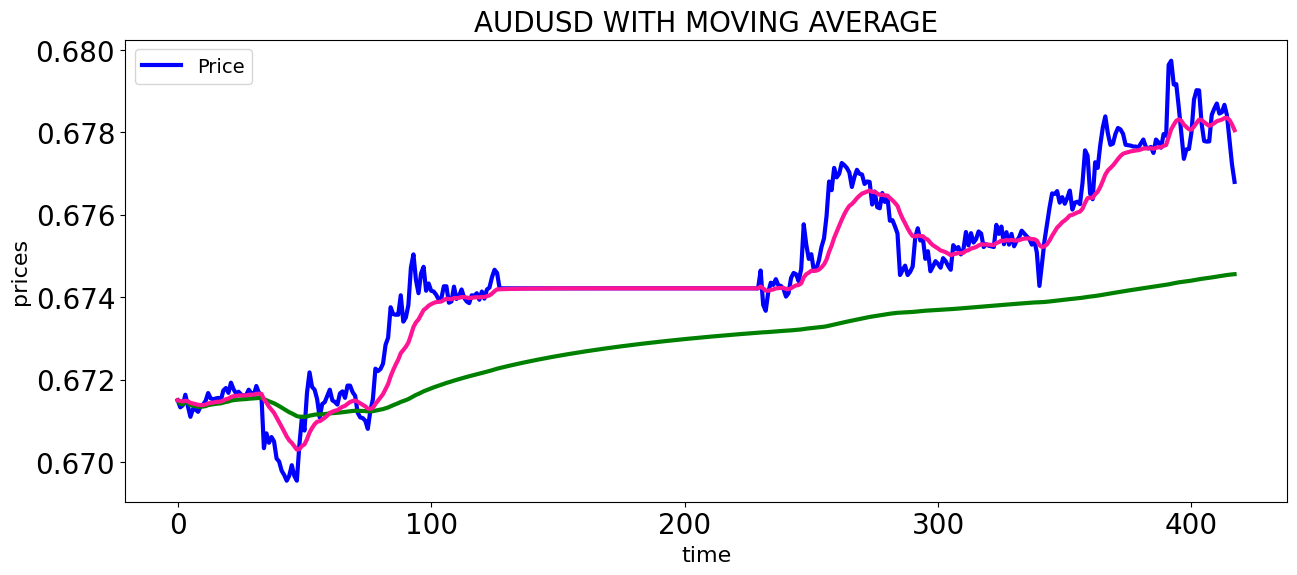

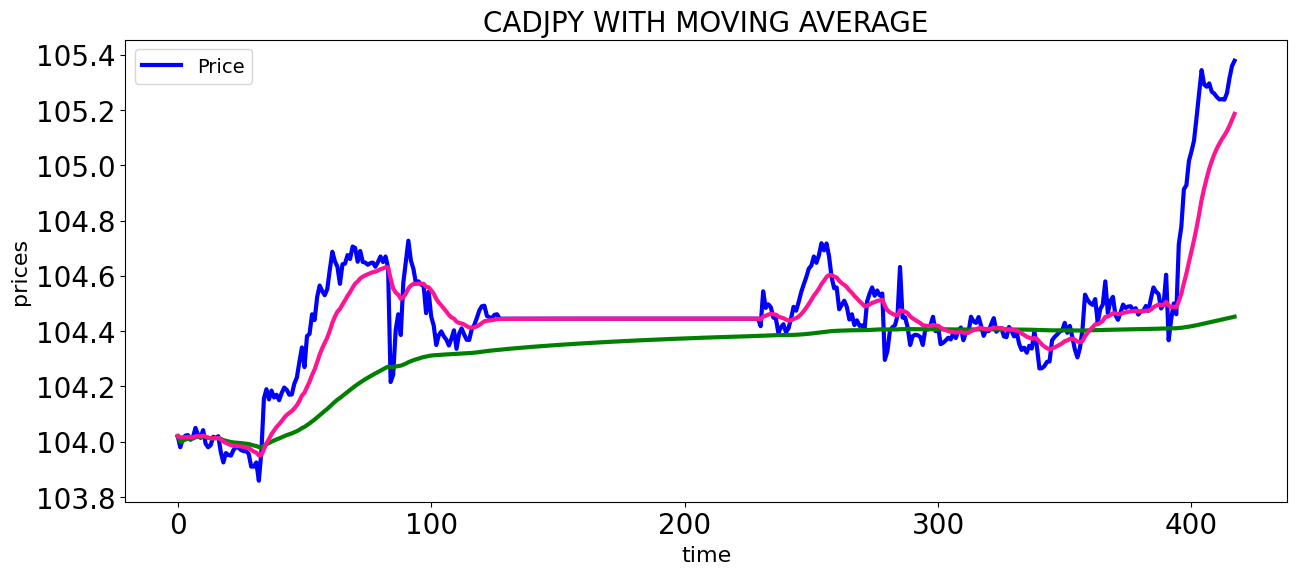

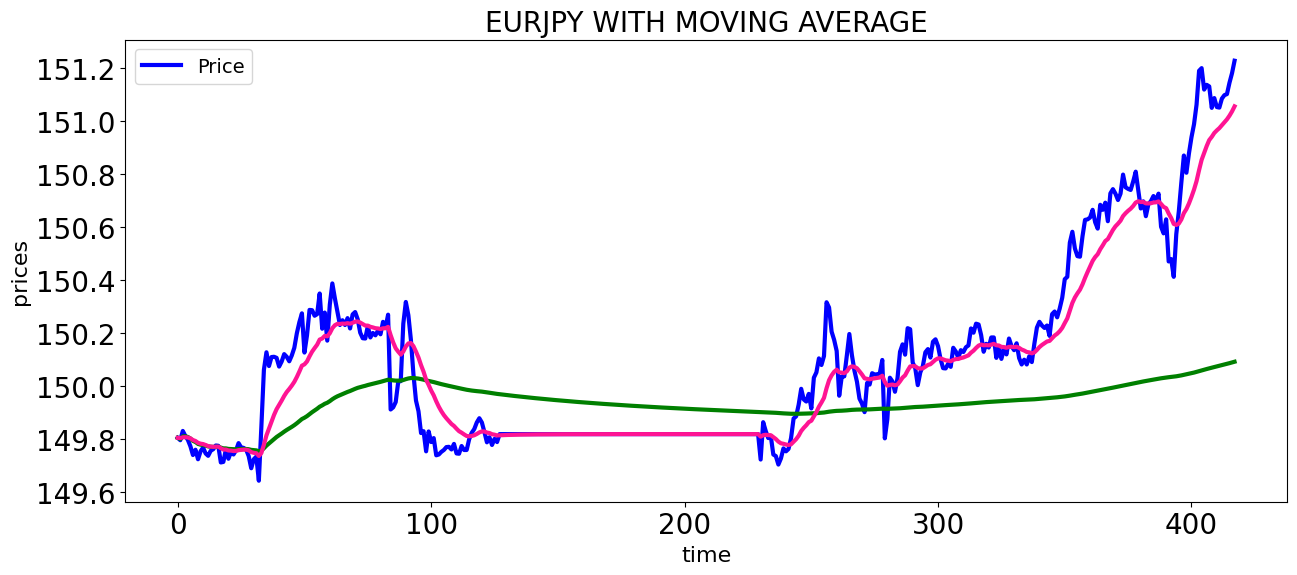

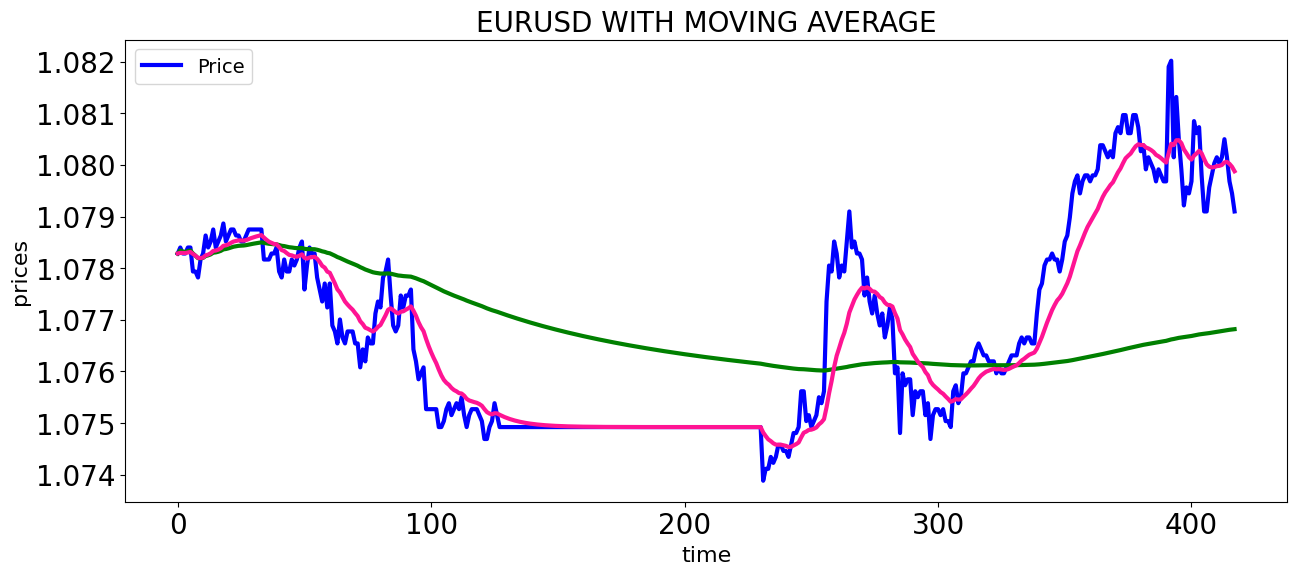

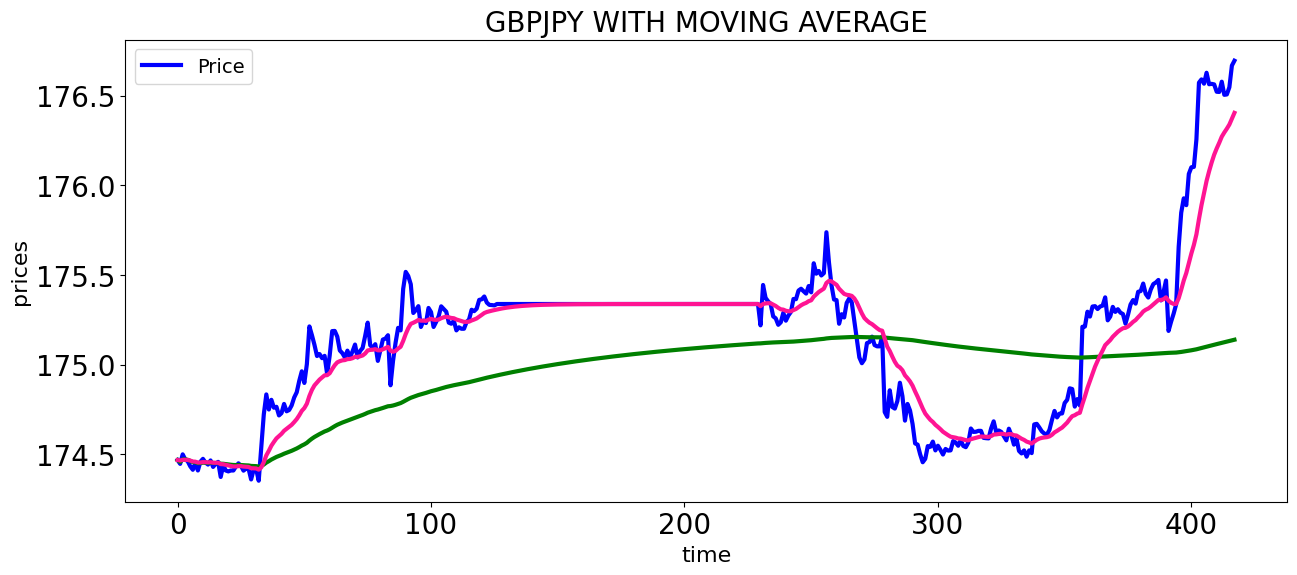

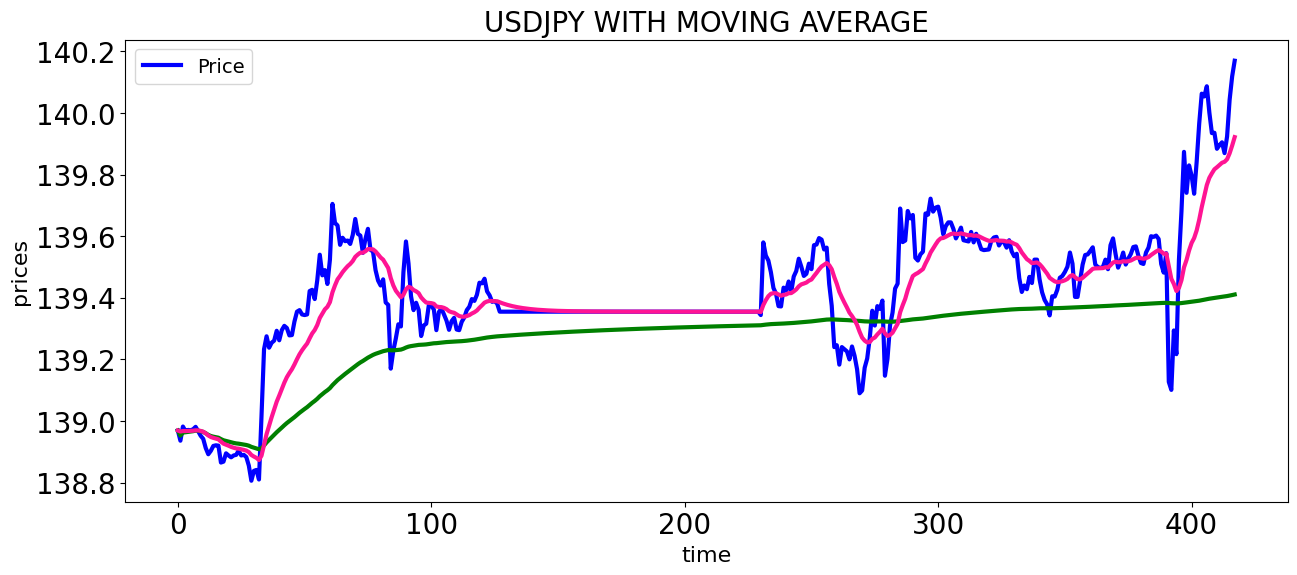

In [149]:
Moving_Average=df.rolling(window=len(df), min_periods=1).mean()

def add_averages(cur_pair):
    global df    
    myStr=cur_pair
    myVars = vars()
    myVars.__setitem__(myStr, pd.DataFrame())
    myVars['MA']=Moving_Average[myStr]
    myVars['Prices']=df[myStr]
    myVars['EMA_0.1'] = df[myStr].ewm(alpha=0.1, adjust=False).mean()
    return myVars
def add_averages2(cur_pair):
    PAIR=add_averages(cur_pair)
    #print(type(USDJPY))
    N_PAIR=pd.DataFrame(PAIR['MA'])
    N_PAIR['Prices']=pd.DataFrame(PAIR['Prices'])
    #N_PAIR2=del(N_PAIR2.index())
    N_PAIR['EMA_0.1']=pd.DataFrame(PAIR['EMA_0.1'])
    #N_PAIR3=del(N_PAIR3.index())
    #N_PAIR.merge(N_PAIR2, how='right')
    #N_PAIR.merge(N_PAIR3, how='right')
    N_PAIR.columns=['MA','Prices','EMA_0.1']
    return N_PAIR
for i in n_pairs:
    m=add_averages2(i)
    colors = ['blue','green','deeppink']
    m[['Prices','MA','EMA_0.1']].plot(color=colors, linewidth=3, figsize=(15,6))
# modify ticks size
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.legend(labels =['Price'], fontsize=14)    
    plt.title(str(i)+' WITH MOVING AVERAGE', fontsize=20)    
    plt.xlabel('time', fontsize=16)    
    plt.ylabel('prices', fontsize=16)